PREDICTING USING UNSUPERVISED ML

IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

READ DATASET

In [ ]:
reso = pd.read_csv('Iris.csv')
x = reso.iloc[3,4]

data


In [ ]:
reso.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


SCATTER PLOT OF DATA BEFORE CLUSTURING

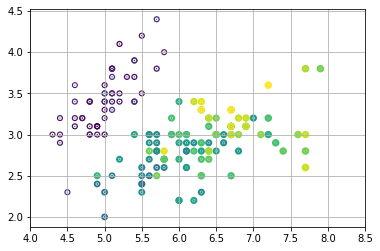

In [ ]:
plt.scatter(reso['SepalLengthCm'],reso['SepalWidthCm'],reso['PetalLengthCm'],reso['PetalWidthCm'],linewidths=5)
plt.xlim(4,8.5)
plt.grid()

ELBOW GRAPH

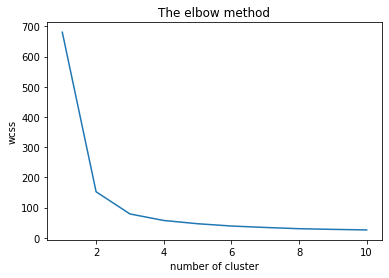

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(reso[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()



In [ ]:
km = KMeans(n_clusters = 3)
km


KMeans(n_clusters=3)

In [ ]:
predict_y = km.fit_predict(reso[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
print("CLUSTER DONE")

CLUSTER DONE


In [ ]:
predict_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
reso['cluster']=predict_y
reso.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1


In [ ]:
reso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   cluster        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


In [ ]:
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

final graph

In [ ]:
# Visualising the clusters - On the first two columns
# plt.scatter(reso[km == 0, 0], reso[predict_y == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
# plt.scatter(reso[km == 1, 0], reso[predict_y == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
# plt.scatter(reso[km == 2, 0], reso[predict_y == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# #plotting the centroid

# plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()

(2.0, 4.5)

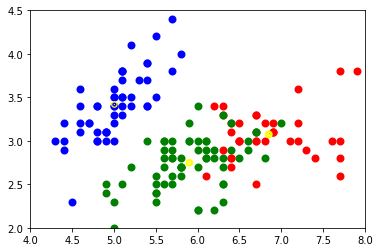

In [ ]:
class_1=reso[reso.cluster==0]   #ASSIGNING THE CLUSTER=0 VALUE TO THE VARIABLE
class_2=reso[reso.cluster==1]   #ASSIGNING THE CLUSTER=1 VALUE TO THE VARIABLE
class_3=reso[reso.cluster==2]   #ASSIGNING THE CLUSTER=2 VALUE TO THE VARIABLE
plt.scatter(class_1['SepalLengthCm'],class_1['SepalWidthCm'],linewidths=3.5,label='Iris-Setosa', s = 20,  c = 'red')
plt.scatter(class_2['SepalLengthCm'],class_2['SepalWidthCm'],linewidths=3.5,label='Iris-Versicolor', s= 20, c = 'blue')
plt.scatter(class_3['SepalLengthCm'],class_3['SepalWidthCm'],linewidths=3.5,label='Iris-Virginica', s = 20,  c ='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],linewidth=5.5,label='Center',  c = 'yellow')
plt.xlim(4,8)
plt.ylim(2,4.5)
# plt.legend()